<div class="alert alert-block alert-info">
    <h1>Análisis de Series Temporales - 2023</h1>
    <h3>Clase 1</h3>
    <h5>Ejercitacion asincronica</h5>
        <p>Docente: Rodrigo Del Rosso<p>
        <p>Asistentes: Sebastián Calcagno y Braian Drago <p>
</div>



<p> <em> En el desarrollo de la siguiente actividad, se les requerirá llevar a cabo ejercicios prácticos y responder preguntas teóricas, las cuales serán abordadas en los espacios asignados para ello.</em> </p>
<b><font size="5"> El ejercicio finaliza con la leyenda "FIN DEL EJERCICIO ASINCRONICO" </b>

In [47]:
# De ser necesario, instalar librerias
# Ejemplo =
# !pip install yfinance

In [48]:
#Importamos librerias
import yfinance as yf
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [49]:
# En el ejemplo en cuestion, analizamos el intervalo de tiempo que va entre
comienzo_fecha = '2020-01-02'

# y la siguiente fecha
fin_fecha = '2022-01-01'

In [50]:
# Obtenga datos cercanos de Yahoo Finance para la empresa Alphabet Inc. (GOOG)
ticker_list = ['GOOG']
data = yf.download(ticker_list, start=comienzo_fecha, end=fin_fecha)[['Close']]

# Primera aproximacion a los datos
data.head()

[*********************100%%**********************]  1 of 1 completed


,Close
Date,
2020-01-02,68.368500
2020-01-03,68.032997
2020-01-06,69.710503
2020-01-07,69.667000
2020-01-08,70.216003


In [51]:
# Mas informacion del dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 505 entries, 2020-01-02 to 2021-12-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   505 non-null    float64
dtypes: float64(1)
memory usage: 7.9 KB


**EJERCICIO 1=**

Realice una descomposición de la serie en sus componentes y proporcione una breve interpretación de los gráficos obtenidos.

In [52]:
from statsmodels.tsa.seasonal import seasonal_decompose
from matplotlib import rcParams
from cycler import cycler
import pandas as pd

In [53]:
rcParams['figure.figsize']= 14, 5
rcParams['axes.spines.top']= False
rcParams['axes.spines.right']= False
rcParams['axes.prop_cycle']= cycler(color=['#CC6633'])
rcParams['lines.linewidth']= 2

<Axes: xlabel='Date'>

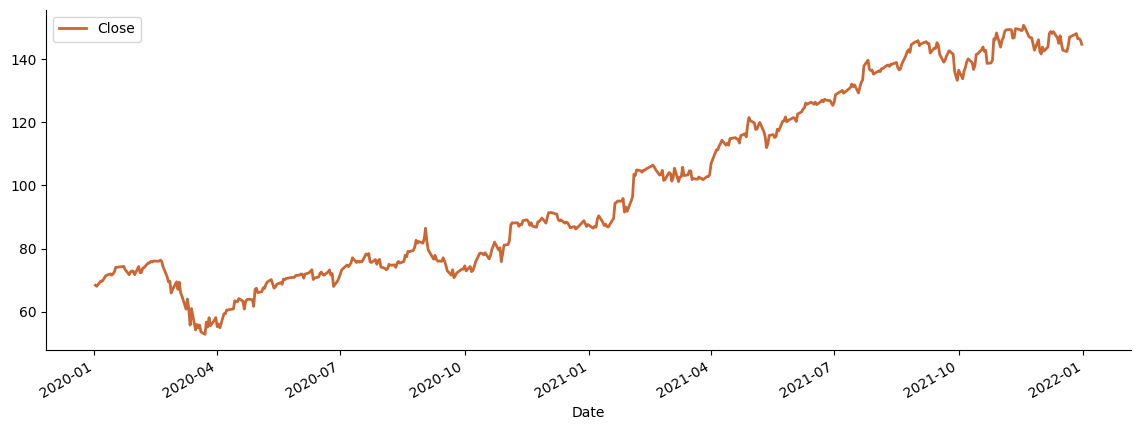

In [54]:
data.plot()

In [55]:
data2 = data.asfreq('d')

In [59]:
data2.dropna(inplace=True)

In [63]:
data2

,Close
Date,
2020-01-02,68.368500
2020-01-03,68.032997
2020-01-06,69.710503
2020-01-07,69.667000
2020-01-08,70.216003
...,...
2021-12-27,148.063995
2021-12-28,146.447998
2021-12-29,146.504501


In [95]:
data2.describe()

,Close
count,505.000000
mean,99.749488
std,29.496330
min,52.831001
25%,73.811501
50%,89.088501
75%,128.718994
max,150.709000


In [90]:
# ESPACIO PARA CODIGO DE DESCOMPOSICION DE LA SERIE =
dec = seasonal_decompose(data2['Close'], model='additive', period=14)

<Axes: xlabel='Date'>

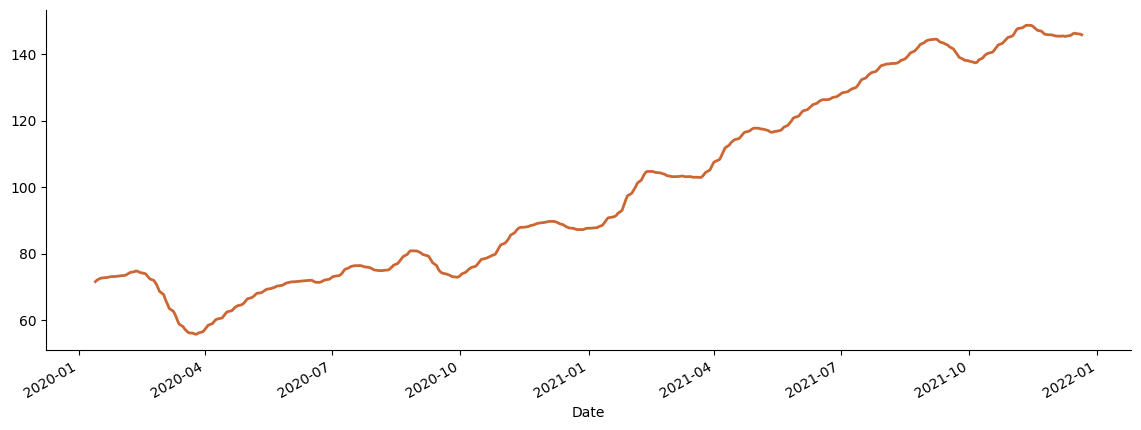

In [92]:
dec.trend.plot()

<Axes: xlabel='Date'>

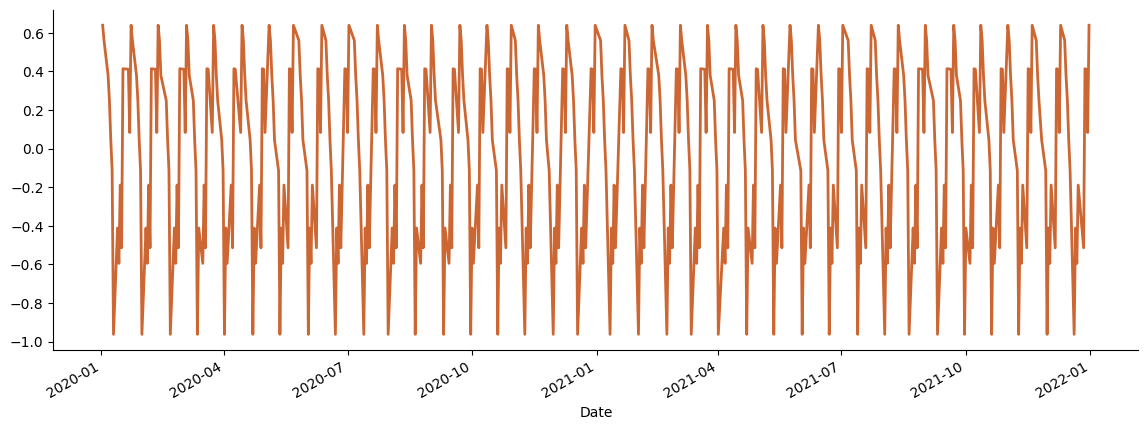

In [93]:
dec.seasonal.plot()

<Axes: xlabel='Date'>

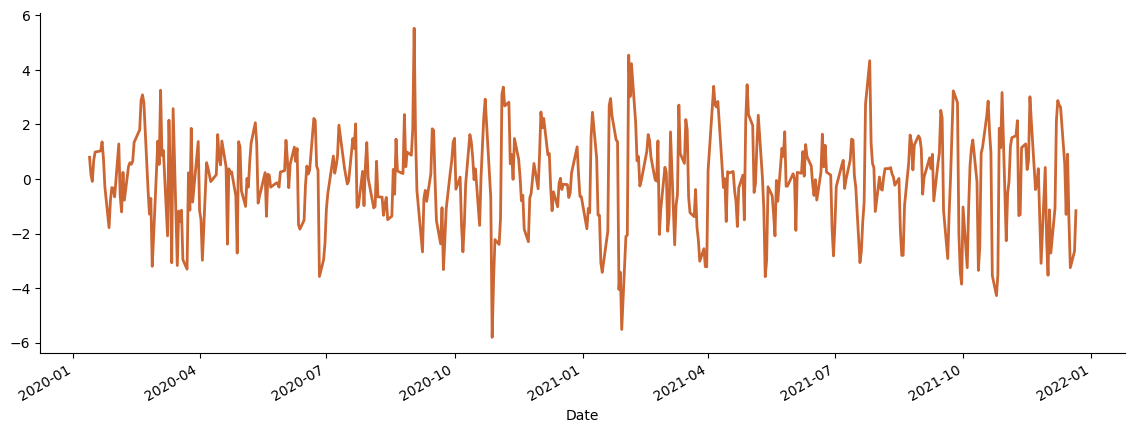

In [91]:
dec.resid.plot()

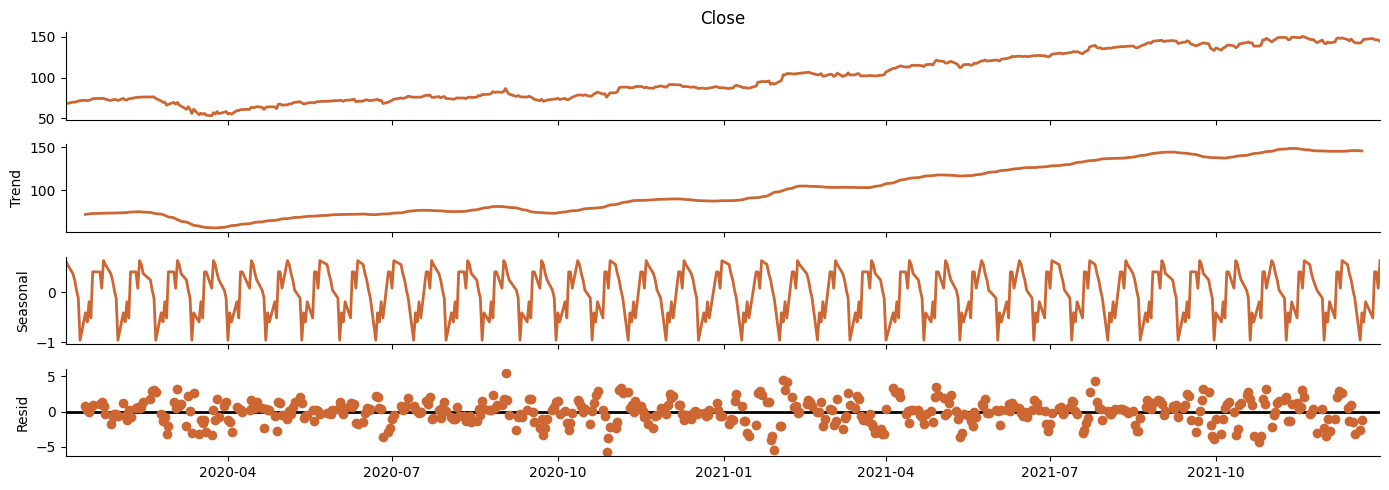

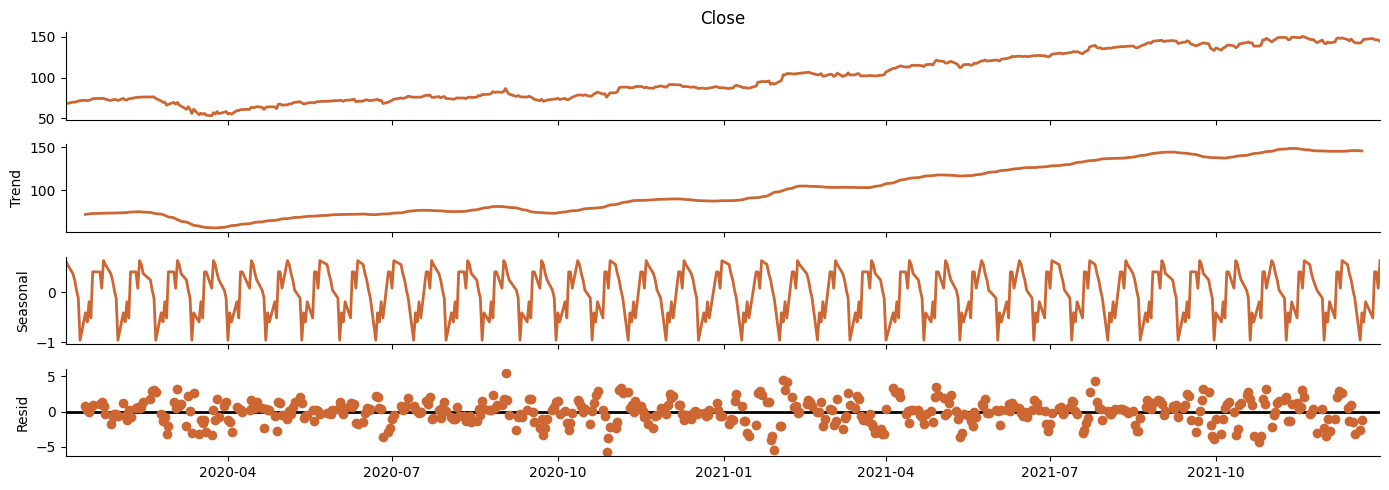

In [94]:
dec.plot()

In [ ]:
""" ESCRIBA AQUI SU INTERPRETACION DE LOS GRAFICOS=

Eligiendo un periodo de 14 dias
La serie tiene una tendencia positiva, con lo que podemos decir que no es estacionaria
La serie tiene estacionalidad bastante notable
Los residuos oscilan dentro de 5 unidades de valor absoluto
en una metrica con 150 de maxima y 29 de desvío estandar, con lo que parece estar razonablemente acotado

"""

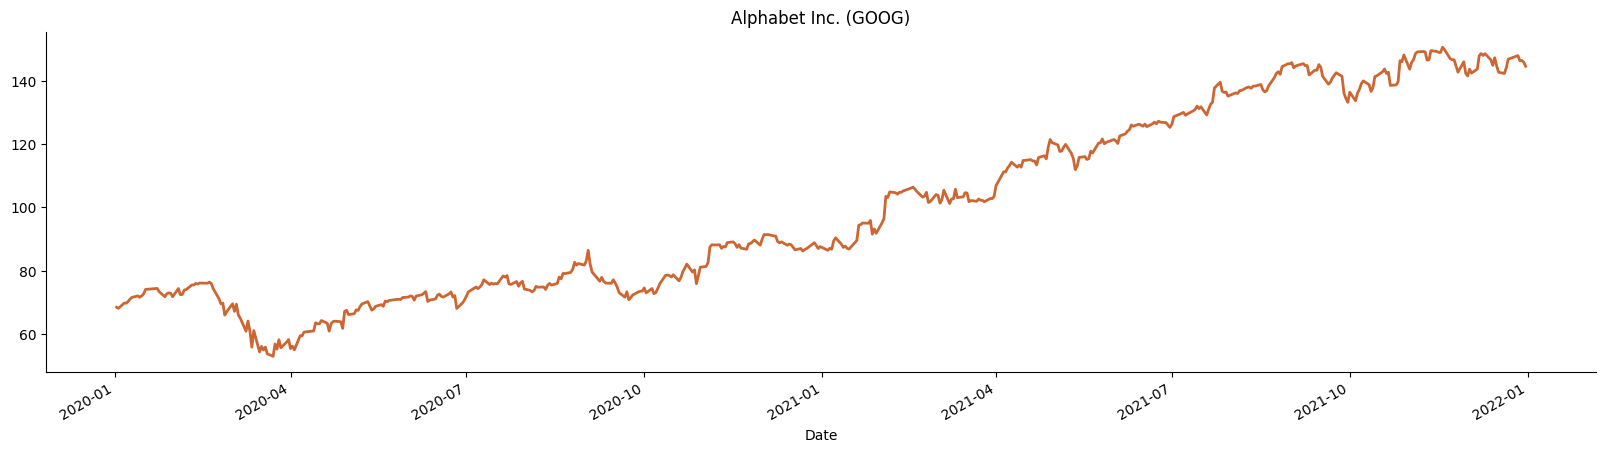

In [96]:
data2.Close.plot(figsize=(20,5), title = "Alphabet Inc. (GOOG)")
plt.show()

**Ejercicio 2=** Analice las particularidades del gráfico. Además, determine si guarda similitudes con un proceso de caminata aleatoria o ruido blanco, y explique las razones que fundamentan su elección.

In [ ]:
""" ESCRIBA AQUI SU RESPUESTA=

El principal detalle del grafico es una clara tendencia hacia valores mayores a lo alrgo del tiempo

Esto quiere decir que no es como un ruido blanco,
puesto que la media va a ser siempre emayor a medida q se tome mas de la serie

Tampoco es como un random walk porque al menos en la muestra, nunca vuelve al cero
Alejarse del punto de origen consistentemente en 500 pasos es poco probable

"""

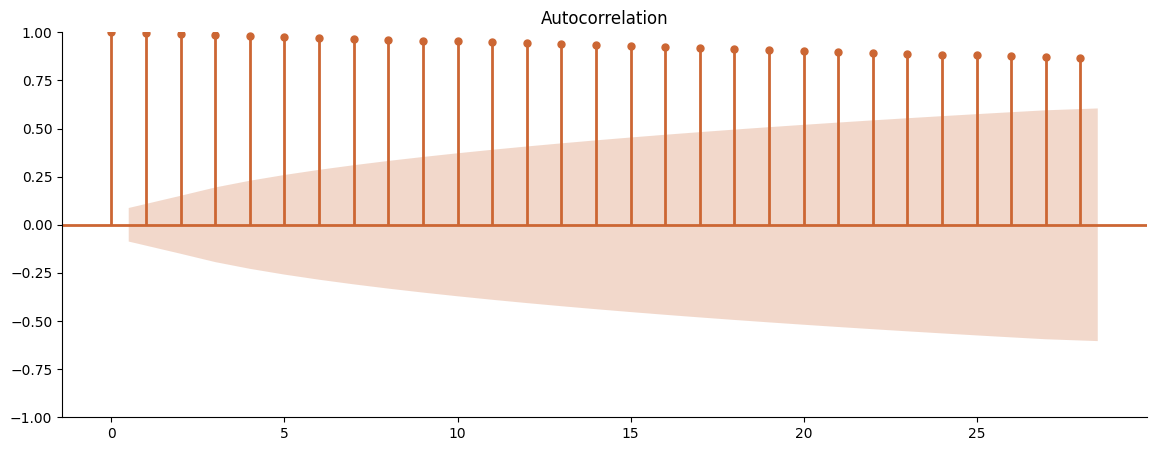

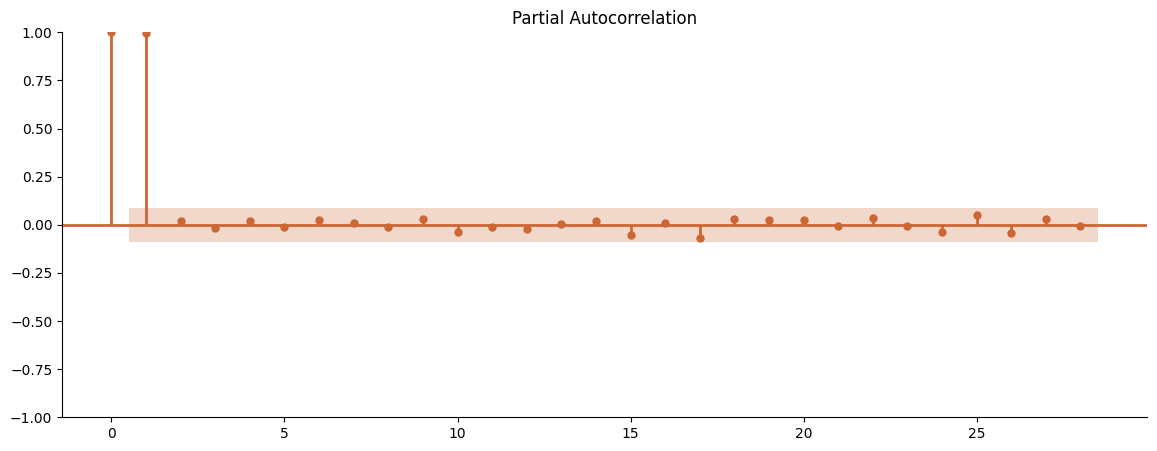

In [97]:
plot_acf(data2['Close']);
plot_pacf(data2['Close']);

**Ejercicio 3=** ¿Cuáles son los atributos fundamentales de una serie estacionaria? A través de cuál de los dos gráficos podríamos evaluar si existe una aproximación a la estacionariedad o no estacionariedad. Además, ¿cuál es la interpretación que se puede hacer del otro gráfico?

In [ ]:
""" ESCRIBA AQUI SU RESPUESTA=

Una serie tiene como atributo fundamental una media constante a lo largo del tiempo
Esto quiere decir que no puede tener una tendencia ni una estacionalidad

El primero de los dos graficos nos sirve para determinar que no es estacionaria

Del segundo grafico podemos ver que las primeras/segundas diferencias no estan autocorrelacionadas,
es decir que cada paso en si es independiete

"""

In [98]:
data_diff=data.copy()
data_diff=data_diff.diff(axis = 0, periods = 1)


In [99]:
data_diff.drop(['2020-01-02'], inplace=True)

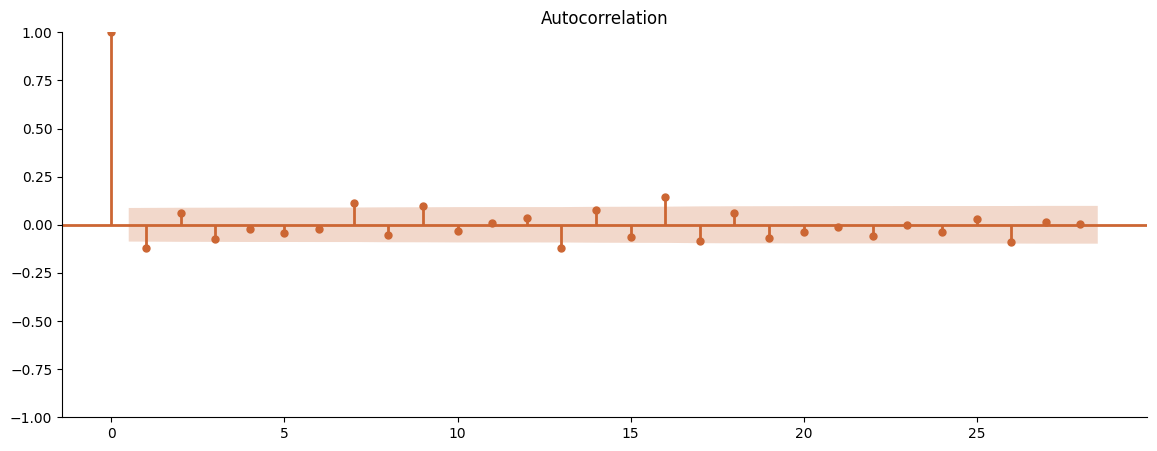

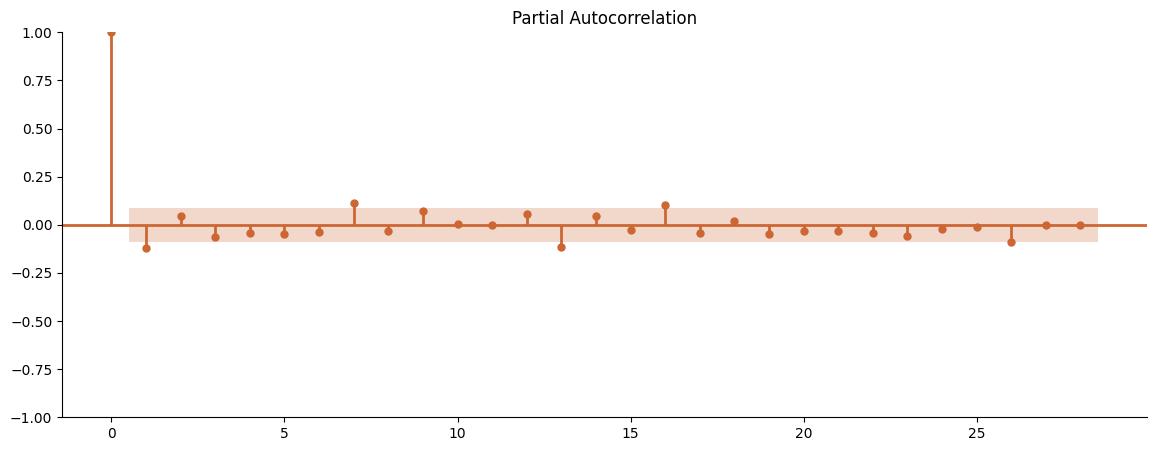

In [100]:
plot_acf(data_diff['Close']);
plot_pacf(data_diff['Close']);

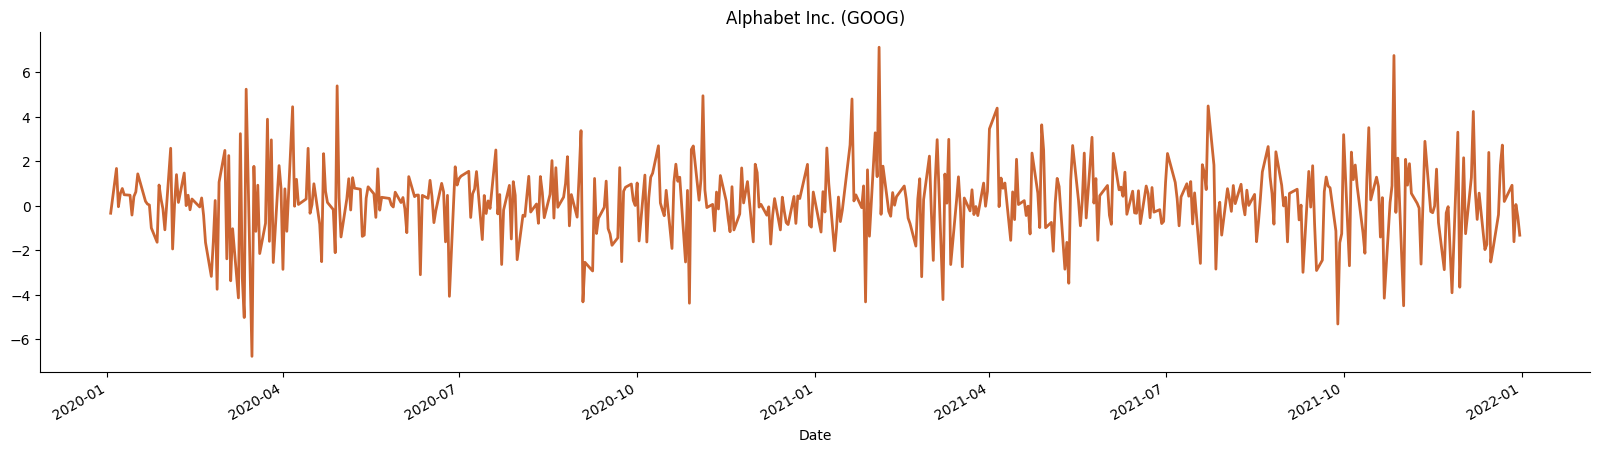

In [101]:
data_diff.Close.plot(figsize=(20,5), title = "Alphabet Inc. (GOOG)")
plt.show()

**Ejercicio 4=** Analice nuevamente las particularidades del gráfico. Además, determine si guarda similitudes con un proceso de caminata aleatoria o ruido blanco, y explique las razones que fundamentan su elección.

In [ ]:
""" ESCRIBA AQUI SU RESPUESTA =

este grafico de la primer diferencia muiestra una serie que parece ser estacionaria
pareciera ser un ruido blanco, esta acotado en limites y no se notan patrones de estacionalidad

"""

<!DOCTYPE html>
<html>
<head>
</head>
<body font size="6">
    <h1>Ejercicio 5= Para finalizar, contestar estas tres preguntas en el espacio asignado a continuacion </h1>
    <ul>
        <li>
            <h2>Pregunta 5-A) Segun el libro de Daniel Peña, ¿cuál es la característica principal que se desprende al observar una serie de tiempo? </h2>
        </li>
            <h2></h2>
            <h2></h2>
    </ul>
</body>
</html>

In [ ]:
""" ESCRIBA AQUI SU RESPUESTA 5-A =







"""

<!DOCTYPE html>
<html>
<head>

</head>
<body>
    <ul>
        <li>
            <h2>Pregunta 5-B) Mencione las principales diferencias entre la estacionaridad estricta y la debil</h2>
        </li>
    </ul>
</body>
</html>

In [ ]:
""" ESCRIBA AQUI SU RESPUESTA 5-B =

En la debil los momentos son constantes y esta definida a traves de los momentos
Promedio de varianza y covarianza constantes a traves del tiempo

En la estricta se basa en la funcion de distribucion

"""

<!DOCTYPE html>
<html>
<head>

</head>
<body>
    <ul>
        <li>
            <h2>Pregunta 5-C) Al examinar los modelos autoregresivos, es deseable que las series temporales sean estacionarias. ¿Cuáles son los problemas más comunes que pueden evitar que las series temporales cumplan con esta estacionariedad?.</h2>
        </li>
    </ul>
</body>
</html>

In [ ]:
""" ESCRIBA AQUI SU RESPUESTA 5-C =

Es deseable porque al ser estacionarias hay una componente menos para modelar

Los problemas comunes son la presencia de una tendencia o de una estacionalidad

"""

<b><font size="5"> "FIN DEL EJERCICIO ASINCRONICO" - Muchas gracias! </b>